## Question 3: Purchasing Insurance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
%matplotlib inline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
import seaborn as sns
sns.set()

Caravan_train = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_train.csv")
Caravan_train.head(1)

In [ ]:
Caravan_test = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")
Caravan_test.head(1)

In [282]:
Caravan_train['Purchase'] = Caravan_train.Purchase.map({'No':0,'Yes':1})

In [283]:
X=Caravan_train.drop('Purchase',axis=1)
y=Caravan_train.Purchase
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=1)

Check for missing values

In [286]:
Caravan_train[Caravan_train.isnull().any(axis=1)]

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,Purchase


# Model Testing
I will use different classification models to predict whether the customer profile will buy insurance

First model is Logistic Regression

In [287]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.94
Accuracy of Logistic regression classifier on test set: 0.93


In [292]:
y_pred_class = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.92919
AUC: 0.70791
[[1076    3]
 [  79    0]]


In [277]:
from sklearn import metrics, cross_validation
logreg=LogisticRegression()
predicted = cross_validation.cross_val_predict(logreg, X, y, cv=10)
print metrics.accuracy_score(y, predicted)
print metrics.classification_report(y, predicted) 

0.9369330453563715
             precision    recall  f1-score   support

          0       0.94      1.00      0.97      4346
          1       0.25      0.01      0.03       284

avg / total       0.90      0.94      0.91      4630



Plot ROC curve for Logisitic Regression

Text(0,0.5,'True Positive Rate (Sensitivity)')

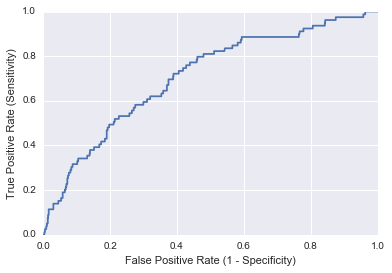

In [289]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Next, Nearest Neighbor.  I will try n_neighbors of 1 and 50

In [296]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=1)
nn.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(nn.score(X_test, y_test)))

Test set R^2: 0.89


In [297]:
y_pred_class = nn.predict(X_test)
y_pred_prob = nn.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.89119
AUC: 0.54274
[[1021   58]
 [  68   11]]


In [298]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=50)
nn.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(nn.score(X_test, y_test)))

Test set R^2: 0.93


In [299]:
y_pred_class = nn.predict(X_test)
y_pred_prob = nn.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.93178
AUC: 0.70672
[[1079    0]
 [  79    0]]


A range of n values will be tested and plotted to determine best accuracy

Text(0,0.5,'Cross-Validated Accuracy')

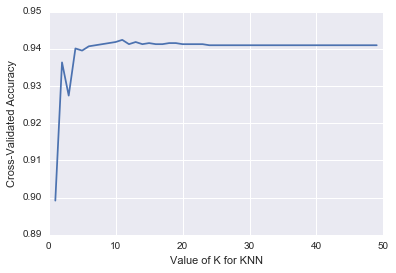

In [300]:
k_range = range(1,50)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

From testng a range of n values in the KNN model, it appears that accuracy isn't enhanced with any more neighbors above 13.
Cross validation will be used to determine the optimal n_neighbors

In [301]:
from sklearn.model_selection import cross_val_score
myList = list(range(1,20))
neighbors = filter(lambda x: x % 2 != 0, myList)
cv_scores = []
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

The optimal number of neighbors is 11


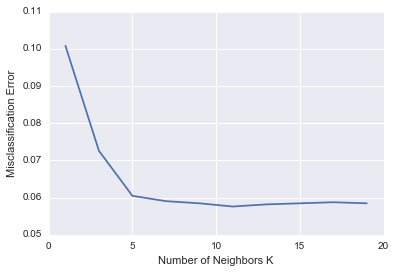

In [302]:

MSE = [1 - x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print "The optimal number of neighbors is %d" % optimal_k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

Cross Validation provided an optimal n neighbors of 13. I will use this number in my model

In [309]:
from sklearn.neighbors import KNeighborsClassifier
nn = KNeighborsClassifier(n_neighbors=13)
nn.fit(X_train, y_train)
print("Test set R^2: {:.2f}".format(nn.score(X_test, y_test)))

Test set R^2: 0.93


In [310]:
y_pred_class = nn.predict(X_test)
y_pred_prob = nn.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.93092
AUC: 0.70141
[[1078    1]
 [  79    0]]


Plot ROC curve for K Nearest Neighbor

Text(0,0.5,'True Positive Rate (Sensitivity)')

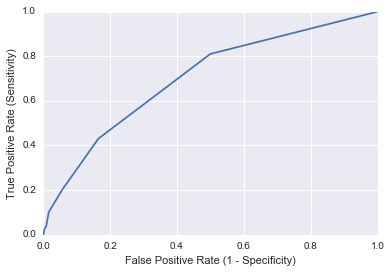

In [311]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

Next models to try are the Decision Tree Classifer and the Random Forest Classifier

In [305]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 0.99
Accuracy of Decision Tree classifier on test set: 0.88


In [306]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.88428
AUC: 0.51603
[[1016   63]
 [  71    8]]


In [307]:
from sklearn.ensemble import RandomForestClassifier
fclf=RandomForestClassifier().fit(X_train,y_train)
print('Accuracy of Decision Forest classifier on training set: {:.2f}'
     .format(fclf.score(X_train, y_train)))
print('Accuracy of Decision Forest classifier on test set: {:.2f}'
     .format(fclf.score(X_test, y_test)))

Accuracy of Decision Forest classifier on training set: 0.98
Accuracy of Decision Forest classifier on test set: 0.92


In [308]:
y_pred_class = fclf.predict(X_test)
y_pred_prob = fclf.predict_proba(X_test)[:, 1]
print ('Accuracy Score: {:.5f}'.format(metrics.accuracy_score(y_test, y_pred_class)))
print ('AUC: {:.5f}'.format(metrics.roc_auc_score(y_test, y_pred_prob)))
print metrics.confusion_matrix(y_test, y_pred_class)

Accuracy Score: 0.91710
AUC: 0.60960
[[1059   20]
 [  76    3]]


The next model is Naive Bayes
I will run a MultinomialNB and the GaussianNB for comparison.

In [314]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(nb.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(nb.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on training set: 0.77
Accuracy of Naive Bayes classifier on test set: 0.75


In [315]:
y_pred_class = nb.predict(X_test)
y_pred_prob = nb.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)

0.7452504317789291
0.716404077849861
[[821 258]
 [ 37  42]]


In [316]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of Naive Bayes classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of Naive Bayes classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of Naive Bayes classifier on training set: 0.12
Accuracy of Naive Bayes classifier on test set: 0.12


In [313]:
y_pred_class = gnb.predict(X_test)
y_pred_prob = gnb.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)

0.1234887737478411
0.7079809012095118
[[  67 1012]
 [   3   76]]


Gaussian is best suited for data with a normal distribution. With majority false positives in the confusion matrix, GaussianNB is not appropriate for this data set.

Caravan data will now be run on a Neural Network model

In [226]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(solver='lbfgs')
mlpc.fit(X_train,y_train)
print('Accuracy of NN classifier on training set: {:.2f}'
     .format(mlpc.score(X_train, y_train)))
print('Accuracy of NN classifier on test set: {:.2f}'
     .format(mlpc.score(X_test, y_test)))

Accuracy of NN classifier on training set: 0.96
Accuracy of NN classifier on test set: 0.92


In [227]:
y_pred_class = mlpc.predict(X_test)
y_pred_prob = mlpc.predict_proba(X_test)[:, 1]
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.roc_auc_score(y_test, y_pred_prob)
print metrics.confusion_matrix(y_test, y_pred_class)

0.9153713298791019
0.626179604261796
[[1056   39]
 [  59    4]]


The final model to test will be the Support Vector Machine.

In [228]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
print('Accuracy of SVC classifier on training set: {:.2f}'
     .format(svc.score(X_train, y_train)))
print('Accuracy of SVC classifier on test set: {:.2f}'
     .format(svc.score(X_test, y_test)))

Accuracy of SVC classifier on training set: 0.94
Accuracy of SVC classifier on test set: 0.95


In [229]:
y_pred_class = svc.predict(X_test)
print metrics.accuracy_score(y_test, y_pred_class)
print metrics.confusion_matrix(y_test, y_pred_class)

0.9455958549222798
[[1095    0]
 [  63    0]]


# Final step will be to apply my most accuract model and get the top 50 customer profiles to approach about buying insurance

In [ ]:
Caravan_test = pd.read_csv("http://www.webpages.uidaho.edu/~stevel/Datasets/Caravan_unk.csv")

I will apply the logistic regression classifer to the Caravan test data.  This model had the highest area under curve score.

In [325]:
y_preds=logreg.predict_proba(Caravan_test)[:,1]
Caravan_test["preds"]=y_preds
Caravan_test.nlargest(50,'preds')

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,...,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,preds
30,2,1,3,4,1,1,5,2,3,5,...,0,0,0,1,0,2,0,0,1,0.908511
557,30,1,3,3,7,0,4,1,4,6,...,0,0,0,1,0,0,0,0,0,0.651081
738,8,1,3,3,2,0,9,0,0,7,...,0,0,0,1,0,0,0,0,1,0.595645
651,8,1,3,3,2,0,9,0,0,7,...,0,0,0,1,0,0,0,0,0,0.470672
868,8,1,3,3,2,1,6,2,2,8,...,0,0,0,1,0,0,0,0,0,0.414618
2,1,1,4,3,1,1,5,1,3,6,...,0,0,0,1,0,0,0,0,0,0.406065
389,3,1,3,4,1,0,7,1,2,7,...,0,0,0,1,0,0,2,0,1,0.381937
267,33,1,2,4,8,0,5,2,2,6,...,0,0,0,1,0,0,0,0,0,0.372782
693,7,1,4,3,2,0,5,0,4,9,...,0,0,0,0,0,0,0,0,0,0.370382
739,39,1,2,4,9,0,2,4,4,7,...,0,0,0,0,0,0,0,0,1,0.353890
